<a href="https://colab.research.google.com/github/azarkiel/practicasEnEmpresa/blob/main/RayosCosmicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importo paquetes que voy a utilizar
import pandas as pd
import numpy as np

# from google.colab import drive

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import glob
import io

In [2]:
# Defino el path donde trabajaré creditcardcsvpresent.csv
# Marco el path de trabajo
# drive.mount('/content/gdrive')
# os.chdir("/content/gdrive/My Drive/Python-Colab/Master IA (apredizaje automático LAB)/")
# os.chdir("/content/gdrive/My Drive/Colab Notebooks/rayoscosmiscos/dataset/")
# %ls *.csv

In [3]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
# from google.colab import files
# from google.colab import drive
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile({'q': "'1HKjfOi5NHNavJbvWoMeVudXRJ29QnnNK' in parents"}).GetList()

# 3. Se lee cada fichero y se concatena. Se tiene en cuenta que los ficheros no tienen cabecera ni nombres de columna
li = []
for f in file_list:
    fname = os.path.join(local_download_path, f['title'])
    print("Se ha leido:  " + fname)
    df = pd.read_csv(fname, index_col=None, header=None)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)


# 4. Asignamos nombre a las columnas. Los ficheros no contienen cabeceras, puesto que fueron modificados a mano, para poder leerlos sin problemas.
df.columns = ['Event_Number','Ini_E[MeV]','Ini_X[cm]','Ini_Y[cm]','Ini_Z[cm]','Ini_Theta','Ini_Phi','Number_of_hits']
# df.columns = ['Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]']


Se ha leido:  /root/data/simple_electrons_at_178MeV.csv
Se ha leido:  /root/data/simple_electrons_at_133MeV.csv
Se ha leido:  /root/data/simple_electrons_at_100MeV.csv
Se ha leido:  /root/data/simple_electrons_at_56MeV.csv
Se ha leido:  /root/data/simple_electrons_at_10MeV.csv


In [4]:
# # Se buscan y abren todos los ficheros csv de la carpeta path
# # path = r'C:\Users\MIA\OneDrive - UNIR\MasterIA\Asignaturas\2ºCuatrimestre\008 PRÁCTICAS EN EMPRESA (ONLINE)\99 Notebooks\dataset'

# # path = r'\dataset'
# path = r'\rayoscosmiscos\dataset'
# # path = !pwd


# # all_files = glob.glob(str(path) + "/*.csv")
# # all_files = %ls *.csv
# li = []


# for filename in all_files:
#     print("Se ha leido:  " + filename)
#     df = pd.read_csv(filename, index_col=None, header=None)
#     li.append(df)

# df = pd.concat(li, axis=0, ignore_index=True)

# # Se lee el fichero de eventos de rayos cósmicos
# # df = pd.read_csv("dataset//simple_electrons_at_10MeV.csv")
# # df = pd.read_csv("dataset//simple_electrons_at_56MeV.csv")
# # df = pd.read_csv("dataset//simple_electrons_at_100MeV.csv")
# # df = pd.read_csv("dataset//simple_electrons_at_133MeV.csv")
# # df = pd.read_csv("dataset//simple_electrons_at_178MeV.csv")
# # df=pd.read_csv("subfolder//file.csv", encoding="utf-8") 


# # Como no ha recogido los nombres correctos se nombran las diferentes columnas
# # Tenemos dos opciones según se corresponda con registro de evento o de hits en placa del detector
# df.columns = ['Event_Number','Ini_E[MeV]','Ini_X[cm]','Ini_Y[cm]','Ini_Z[cm]','Ini_Theta','Ini_Phi','Number_of_hits']
# # df.columns = ['Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]']



In [5]:
# Se imprime el dataframe para comprobar que ha cargado
# print(df)
dfOriginal=df.copy()
display(df)

,Event_Number,Ini_E[MeV],Ini_X[cm],Ini_Y[cm],Ini_Z[cm],Ini_Theta,Ini_Phi,Number_of_hits
0,1,178.0,1.00,1.0,-220.00000,0.0,0.0,3.0
1,1,6.3,6.05,-187.3,1.19420,NaN,NaN,NaN
2,2,6.3,6.05,-134.8,2.83014,NaN,NaN,NaN
3,4,-6.3,6.05,-13.2,6.95892,NaN,NaN,NaN
4,2,178.0,1.00,1.0,-220.00000,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...
1977,1,6.3,6.05,-187.3,116.03300,NaN,NaN,NaN
1978,90,10.0,1.00,1.0,-220.00000,0.0,0.0,1.0
1979,1,6.3,6.05,-187.3,11.50700,NaN,NaN,NaN
1980,91,10.0,1.00,1.0,-220.00000,0.0,0.0,1.0


In [6]:
# Guardamos todos los eventos y hits en un csv temporal
dfAllEvents = df.copy()
# dfAllEvents['Number_of_hits'].fillna('finHit', inplace=True)
dfAllEvents.to_csv("todosLosEventos.csv")
# dfAllEvents = dfAllEvents.sort_values(by=['Event_Number'], ascending=True)
display(dfAllEvents)

,Event_Number,Ini_E[MeV],Ini_X[cm],Ini_Y[cm],Ini_Z[cm],Ini_Theta,Ini_Phi,Number_of_hits
0,1,178.0,1.00,1.0,-220.00000,0.0,0.0,3.0
1,1,6.3,6.05,-187.3,1.19420,NaN,NaN,NaN
2,2,6.3,6.05,-134.8,2.83014,NaN,NaN,NaN
3,4,-6.3,6.05,-13.2,6.95892,NaN,NaN,NaN
4,2,178.0,1.00,1.0,-220.00000,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...
1977,1,6.3,6.05,-187.3,116.03300,NaN,NaN,NaN
1978,90,10.0,1.00,1.0,-220.00000,0.0,0.0,1.0
1979,1,6.3,6.05,-187.3,11.50700,NaN,NaN,NaN
1980,91,10.0,1.00,1.0,-220.00000,0.0,0.0,1.0


In [7]:
# Se muestra un resumen del contenido del dataframe
df.describe()

,Event_Number,Ini_E[MeV],Ini_X[cm],Ini_Y[cm],Ini_Z[cm],Ini_Theta,Ini_Phi,Number_of_hits
count,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,491.0,491.0,491.000000
mean,14.086276,26.815187,2.485192,-86.181584,150.047024,0.0,0.0,3.036660
std,24.875990,50.316038,8.503983,75.799751,320.849880,0.0,0.0,1.274026
min,1.000000,-56.700000,-42.350000,-187.300000,-220.000000,0.0,0.0,1.000000
25%,1.000000,6.300000,1.000000,-134.800000,1.050665,0.0,0.0,2.000000
50%,3.000000,6.300000,6.050000,-96.900000,107.687500,0.0,0.0,3.000000
75%,4.000000,18.900000,6.050000,-13.200000,334.346750,0.0,0.0,4.000000
max,100.000000,178.000000,54.450000,1.000000,998.229000,0.0,0.0,9.000000


In [8]:
# Se muestran los 10 primeros registros del dataframe
df.head(10)

,Event_Number,Ini_E[MeV],Ini_X[cm],Ini_Y[cm],Ini_Z[cm],Ini_Theta,Ini_Phi,Number_of_hits
0,1,178.0,1.00,1.0,-220.00000,0.0,0.0,3.0
1,1,6.3,6.05,-187.3,1.19420,NaN,NaN,NaN
2,2,6.3,6.05,-134.8,2.83014,NaN,NaN,NaN
3,4,-6.3,6.05,-13.2,6.95892,NaN,NaN,NaN
4,2,178.0,1.00,1.0,-220.00000,0.0,0.0,4.0
5,1,6.3,6.05,-187.3,1.06770,NaN,NaN,NaN
6,2,6.3,6.05,-134.8,2.89134,NaN,NaN,NaN
7,3,6.3,6.05,-96.9,4.28646,NaN,NaN,NaN
8,4,6.3,-6.05,-13.2,7.28426,NaN,NaN,NaN
9,3,178.0,1.00,1.0,-220.00000,0.0,0.0,4.0


In [9]:
# Se muestran los 10 ultimos registros del dataframe
# df.tail(10)

In [10]:
# from tabulate import tabulate
# print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

## 01.Deteccion de datos nulos e imputacion de **valores**

In [11]:
df.isnull().sum()

Event_Number         0
Ini_E[MeV]           0
Ini_X[cm]            0
Ini_Y[cm]            0
Ini_Z[cm]            0
Ini_Theta         1491
Ini_Phi           1491
Number_of_hits    1491
dtype: int64

In [12]:
# Recogemos solo los eventos, que se corresponden con las filas que no tienen NaN en ['Ini_Theta', 'Ini_Phi','Number_of_hits']
dfEvents = df.dropna(subset=['Ini_Theta', 'Ini_Phi','Number_of_hits'],thresh=3)

In [13]:
dfEvents.describe()

,Event_Number,Ini_E[MeV],Ini_X[cm],Ini_Y[cm],Ini_Z[cm],Ini_Theta,Ini_Phi,Number_of_hits
count,491.000000,491.000000,491.0,491.0,491.0,491.0,491.0,491.000000
mean,49.665988,96.965377,1.0,1.0,-220.0,0.0,0.0,3.036660
std,28.485271,57.914053,0.0,0.0,0.0,0.0,0.0,1.274026
min,1.000000,10.000000,1.0,1.0,-220.0,0.0,0.0,1.000000
25%,25.000000,56.000000,1.0,1.0,-220.0,0.0,0.0,2.000000
50%,50.000000,100.000000,1.0,1.0,-220.0,0.0,0.0,3.000000
75%,74.000000,133.000000,1.0,1.0,-220.0,0.0,0.0,4.000000
max,100.000000,178.000000,1.0,1.0,-220.0,0.0,0.0,9.000000


In [14]:
dfEvents.head(10)

,Event_Number,Ini_E[MeV],Ini_X[cm],Ini_Y[cm],Ini_Z[cm],Ini_Theta,Ini_Phi,Number_of_hits
0,1,178.0,1.0,1.0,-220.0,0.0,0.0,3.0
4,2,178.0,1.0,1.0,-220.0,0.0,0.0,4.0
9,3,178.0,1.0,1.0,-220.0,0.0,0.0,4.0
14,4,178.0,1.0,1.0,-220.0,0.0,0.0,3.0
18,5,178.0,1.0,1.0,-220.0,0.0,0.0,2.0
21,6,178.0,1.0,1.0,-220.0,0.0,0.0,6.0
28,7,178.0,1.0,1.0,-220.0,0.0,0.0,4.0
33,8,178.0,1.0,1.0,-220.0,0.0,0.0,3.0
37,9,178.0,1.0,1.0,-220.0,0.0,0.0,3.0
41,10,178.0,1.0,1.0,-220.0,0.0,0.0,4.0


In [15]:
# dfEvents.tail(10)

In [16]:
# Unimos los dos dataframes
dfUnion = df.merge(dfEvents, how='outer', indicator='union')

#Nos quedamos con las filas que están en el df y no están en el dfEvents, es decir los Hits
dfHits = dfUnion[dfUnion.union=='left_only']

# Eliminamos las columnas innecesarias y la columna "union" del join anterior
dfHits.pop('Ini_Theta')
dfHits.pop('Ini_Phi')
dfHits.pop('Number_of_hits')
dfHits.pop('union')


dfHits.columns = ['Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]']

In [17]:
dfHits.describe()

,Plane_h,X_h[cm],Y_h[cm],Z_h[cm],Time_h[ns]
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000
mean,2.369551,3.714085,2.974279,-114.891281,271.906910
std,1.167047,10.359412,9.756144,65.646897,277.279760
min,1.000000,-56.700000,-42.350000,-187.300000,0.991923
25%,1.000000,-6.300000,-6.050000,-187.300000,11.433000
50%,2.000000,6.300000,6.050000,-134.800000,116.581000
75%,3.000000,6.300000,6.050000,-96.900000,440.595000
max,4.000000,69.300000,54.450000,-13.200000,998.229000


In [18]:
dfHits.head(10)

,Plane_h,X_h[cm],Y_h[cm],Z_h[cm],Time_h[ns]
1,1,6.3,6.05,-187.3,1.19420
2,2,6.3,6.05,-134.8,2.83014
3,4,-6.3,6.05,-13.2,6.95892
5,1,6.3,6.05,-187.3,1.06770
6,2,6.3,6.05,-134.8,2.89134
7,3,6.3,6.05,-96.9,4.28646
8,4,6.3,-6.05,-13.2,7.28426
10,1,6.3,6.05,-187.3,1.07830
11,2,6.3,6.05,-134.8,2.85574
12,3,6.3,6.05,-96.9,4.23080


---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

---

## JUGAMOS CON LOS DATOS

### CORRELACION DE LOS EVENTS

[Text(0.5, 0, 'Event_Number'),
 Text(1.5, 0, 'Ini_E[MeV]'),
 Text(2.5, 0, 'Ini_X[cm]'),
 Text(3.5, 0, 'Ini_Y[cm]'),
 Text(4.5, 0, 'Ini_Z[cm]'),
 Text(5.5, 0, 'Ini_Theta'),
 Text(6.5, 0, 'Ini_Phi'),
 Text(7.5, 0, 'Number_of_hits')]

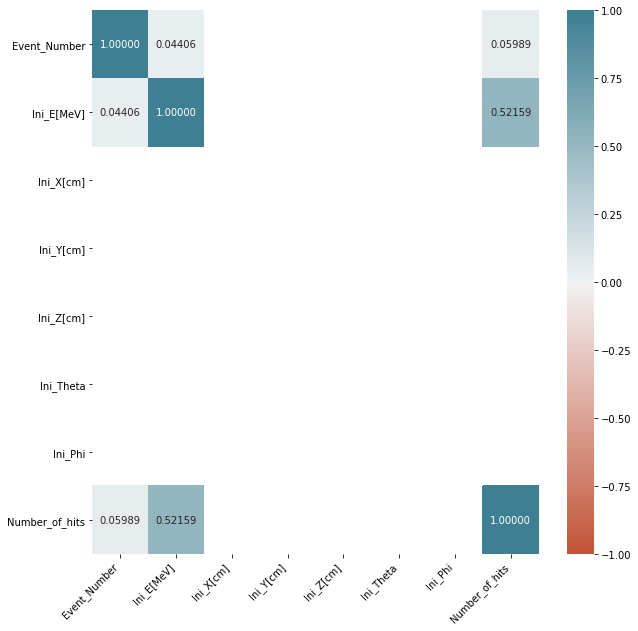

In [19]:
# Vamos a estudiar las correlaciones para entender las variables
# Calcula coeficiente de correlación de Pearson
corr2 = dfEvents.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(10,10))
ax = sns.heatmap(
 corr2,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=False, annot=True, fmt=".5f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

In [33]:
display(dfEvents.corr())

,Event_Number,Ini_E[MeV],Ini_X[cm],Ini_Y[cm],Ini_Z[cm],Ini_Theta,Ini_Phi,Number_of_hits
Event_Number,1.000000,0.044055,NaN,NaN,NaN,NaN,NaN,0.059891
Ini_E[MeV],0.044055,1.000000,NaN,NaN,NaN,NaN,NaN,0.521589
Ini_X[cm],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ini_Y[cm],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ini_Z[cm],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ini_Theta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ini_Phi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_hits,0.059891,0.521589,NaN,NaN,NaN,NaN,NaN,1.000000


In [21]:
dfEvents.describe()

,Event_Number,Ini_E[MeV],Ini_X[cm],Ini_Y[cm],Ini_Z[cm],Ini_Theta,Ini_Phi,Number_of_hits
count,491.000000,491.000000,491.0,491.0,491.0,491.0,491.0,491.000000
mean,49.665988,96.965377,1.0,1.0,-220.0,0.0,0.0,3.036660
std,28.485271,57.914053,0.0,0.0,0.0,0.0,0.0,1.274026
min,1.000000,10.000000,1.0,1.0,-220.0,0.0,0.0,1.000000
25%,25.000000,56.000000,1.0,1.0,-220.0,0.0,0.0,2.000000
50%,50.000000,100.000000,1.0,1.0,-220.0,0.0,0.0,3.000000
75%,74.000000,133.000000,1.0,1.0,-220.0,0.0,0.0,4.000000
max,100.000000,178.000000,1.0,1.0,-220.0,0.0,0.0,9.000000


Se observa que hay correlación entre el nº de hits del evento y la energía inicial con la que fue "creado".

### CORRELACION DE LOS HITS

[Text(0.5, 0, 'Plane_h'),
 Text(1.5, 0, 'X_h[cm]'),
 Text(2.5, 0, 'Y_h[cm]'),
 Text(3.5, 0, 'Z_h[cm]'),
 Text(4.5, 0, 'Time_h[ns]')]

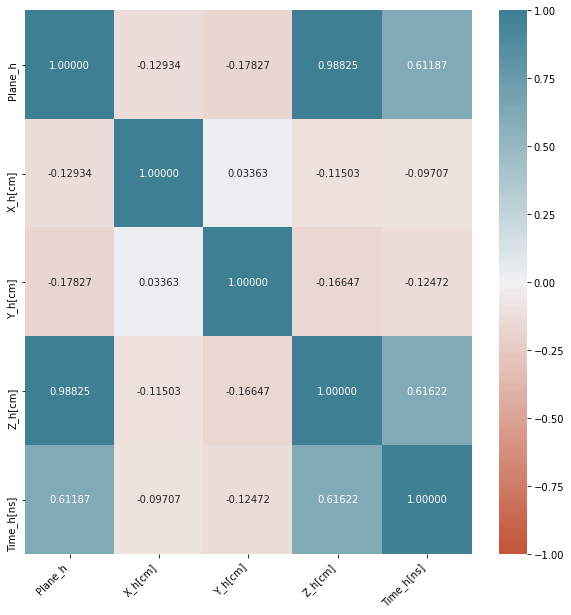

In [22]:
# Vamos a estudiar las correlaciones para entender las variables
# Calcula coeficiente de correlación de Pearson
corr = dfHits.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(10,10))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=False, annot=True, fmt=".5f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

In [23]:
display(dfHits.corr())

,Plane_h,X_h[cm],Y_h[cm],Z_h[cm],Time_h[ns]
Plane_h,1.000000,-0.129342,-0.178266,0.988255,0.611872
X_h[cm],-0.129342,1.000000,0.033630,-0.115035,-0.097074
Y_h[cm],-0.178266,0.033630,1.000000,-0.166473,-0.124717
Z_h[cm],0.988255,-0.115035,-0.166473,1.000000,0.616220
Time_h[ns],0.611872,-0.097074,-0.124717,0.616220,1.000000


Se observa como hay correlación entre el tiempo del hit y la altura a la que se produjo.

Esto tiene todo el sentido, ya que cuanto más abajo se produzca el hit, más tiempo tardará en registrarse.

## VISUALIZACION DE LOS DATOS

#### https://medium.com/analytics-vidhya/5-popular-pandas-column-operations-d860d8c768ac

#### df ['col']. apply (lambda x: x ** 2 + 5)


#### https://pub.towardsai.net/matplotlib-is-dead-long-life-to-plotly-express-e1671dce0d18

#### https://medium.com/plotly/introducing-plotly-express-808df010143d


In [24]:
import plotly.express as px
import plotly.graph_objects as go

In [25]:
# Cambiamos el signo a la altura para poder representar los planos del detector en altura. 0cm=suelo=4ºplaca
# dfHits["Z_h[cm]"] = dfHits["Z_h[cm]"].apply(lambda x: x*-1)

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dfHits)

      Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  Time_h[ns]
1           1      6.3     6.05   -187.3    1.194200
2           2      6.3     6.05   -134.8    2.830140
3           4     -6.3     6.05    -13.2    6.958920
5           1      6.3     6.05   -187.3    1.067700
6           2      6.3     6.05   -134.8    2.891340
7           3      6.3     6.05    -96.9    4.286460
8           4      6.3    -6.05    -13.2    7.284260
10          1      6.3     6.05   -187.3    1.078300
11          2      6.3     6.05   -134.8    2.855740
12          3      6.3     6.05    -96.9    4.230800
13          4      6.3     6.05    -13.2    7.323230
15          1      6.3     6.05   -187.3    1.149710
16          3     -6.3     6.05    -96.9    4.098850
17          4     -6.3    -6.05    -13.2    7.222640
19          1      6.3     6.05   -187.3    1.100990
20          2     -6.3     6.05   -134.8    2.879130
22          1      6.3     6.05   -187.3    1.137750
23          2      6.3    -6.05   -134.8    3.

In [27]:
#  Esta figura representa el detector de rayos visto desde arriba si todas las placas fueran transparentes.
# fig = px.scatter(dfHits, x="X_h[cm]", y="Y_h[cm]")
fig = px.scatter(dfHits, x="X_h[cm]", y="Y_h[cm]", color="Plane_h", size='Time_h[ns]', hover_data=['Time_h[ns]'])
fig.show()


In [28]:
#  Esta figura representa el detector de rayos visto desde un lado
# fig = px.scatter(dfHits, x="X_h[cm]", y="Z_h[cm]")
fig = px.scatter(dfHits, x="X_h[cm]", y="Z_h[cm]", color="Plane_h", size='Time_h[ns]', hover_data=['Time_h[ns]'])
fig.show()

In [29]:
#  Esta figura representa el detector de rayos visto desde el otro lado
# fig = px.scatter(dfHits, x="Y_h[cm]", y="Z_h[cm]")
fig = px.scatter(dfHits, x="Y_h[cm]", y="Z_h[cm]", color="Plane_h", size='Time_h[ns]', hover_data=['Time_h[ns]'])
fig.show()

In [30]:
fig = px.scatter_3d(dfHits, x="X_h[cm]", y="Y_h[cm]", z="Z_h[cm]", color="Plane_h", size='Time_h[ns]', hover_data=['Time_h[ns]'])
fig.show()

In [31]:
fig = px.scatter_matrix(dfHits, dimensions=["X_h[cm]", "Y_h[cm]", "Z_h[cm]", "Time_h[ns]", "Plane_h"], color="Plane_h")
fig.show()

In [32]:
# https://plotly.com/python/static-image-export/

import os

if not os.path.exists("images"):
    os.mkdir("images")
    
# Configuracion para el motor Kaleido   https://plotly.com/python-api-reference/generated/plotly.io.html
import plotly.io as pio
pio.kaleido.scope.default_format = "png"
pio.kaleido.scope.default_scale = 1
# default_width: The default pixel width to use on image export.
# default_height: The default pixel height to use on image export.
# default_scale: The default image scale factor applied on image export.
# default_format: The default image format used on export. One of "png", "jpeg", "webp", "svg", "pdf", or "eps".
# mathjax: Location of the MathJax bundle needed to render LaTeX characters. Defaults to a CDN location. If fully offline export is required, set this to a local MathJax bundle.
# topojson: Location of the topojson files needed to render choropleth traces. Defaults to a CDN location. If fully offline export is required, set this to a local directory containing the Plotly.js topojson files.
# mapbox_access_token: The default Mapbox access token.
  
# fig.write_image("images/fig1.png")
# fig.write_image("images/fig1.jpeg")
# fig.write_image("images/fig1.webp")
# fig.write_image("images/fig1.svg")
fig.write_image("images/fig1orca.png", engine="orca")
fig.write_image("images/fig1kaleido.png", engine="kaleido")
# fig.write_image("images/fig1.pdf")
# fig.write_image("images/fig1.eps")

AttributeError: ignored

In [ ]:
fig = px.box(dfHits, x="Plane_h", y="Time_h[ns]",color="Plane_h")
fig.show()

In [ ]:
fig = px.histogram(dfHits, x="Plane_h")
fig.show()

In [ ]:

# fig = px.parallel_coordinates(dfHits, color="Plane_h", labels={"species_id": "Species",
#                 "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
#                 "petal_width": "Petal Width", "petal_length": "Petal Length", })
fig = px.parallel_coordinates(dfHits, color="Plane_h")
fig.show()

---

---

---

---

---

---

---

---

---

---

---

## IDEA PARA NUEVO DATAFRAME:

dfEvents.columns = ['Event_Number','Ini_E[MeV]','Ini_X[cm]','Ini_Y[cm]','Ini_Z[cm]','Ini_Theta','Ini_Phi','Number_of_hits']
dfHits.columns = ['Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]']

EXCEL CON HITS ASOCIADOS A SU EVENTO:
'Event_Number','Ini_E[MeV]','Ini_Theta','Ini_Phi','Number_of_hits','Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]'

In [ ]:
dfOriginal.head(10)

In [ ]:
dfMixed = dfOriginal.copy()
dfMixed.head(10)

In [ ]:
dfMixed['Number_of_hits'] = dfMixed['Number_of_hits'].fillna(-1)
dfMixed.head(10)

In [ ]:
# dfEvents.columns = ['Event_Number','Ini_E[MeV]','Ini_X[cm]','Ini_Y[cm]','Ini_Z[cm]','Ini_Theta','Ini_Phi','Number_of_hits']
# dfHits.columns = ['Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]']

# OBJETIVO: Tener un dataframe con esta forma: 'Event_Number','Ini_E[MeV]','Ini_Theta','Ini_Phi','Number_of_hits','Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]'

# List of Tuples
hitTest = [ (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)]

#Create a DataFrame object
# dfFull = pd.DataFrame(hitTest, columns=['Event_Number','Ini_E[MeV]','Ini_Theta','Ini_Phi','Number_of_hits', 'Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]'])   
dfFull = pd.DataFrame(columns=['Event_Number','Ini_E[MeV]','Ini_Theta','Ini_Phi','Number_of_hits', 'Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]'])   
    
for i in range(len(dfMixed)): 
#     print(dfMixed.iloc[i,:])
#     print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")
        
    if dfMixed["Number_of_hits"][i] > 0: # Fila de Evento
    
        # Se recogen los valores del evento: Event_Number, Ini_E[MeV], Ini_Theta, Ini_Phi, Number_of_hits
        event_number =   dfMixed.iloc[i,0]
        initial_energy = dfMixed.iloc[i,1]
        initial_tetha =  dfMixed.iloc[i,5]
        initial_phi =    dfMixed.iloc[i,6]
        number_of_hits = dfMixed.iloc[i,7]
        
        # Se corrigen los IDs para no se solapen entre datos de diferentes ficheros
        if initial_energy == 10.0:
            event_number = event_number + 1000
        if initial_energy == 56.0:
            event_number = event_number + 2000
        if initial_energy == 100.0:
            event_number = event_number + 3000
        if initial_energy == 133.0:
            event_number = event_number + 4000
        if initial_energy == 178.0:
            event_number = event_number + 5000
            
        
    else: # Fila de Hit
                
        # Se recogen los valores del hit: 'Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]'              
        hit_plane = dfMixed.iloc[i,0]
        hit_x =     dfMixed.iloc[i,1]
        hit_y =     dfMixed.iloc[i,2]
        hit_z =     dfMixed.iloc[i,3]
        hit_time =  dfMixed.iloc[i,4]        
        
        # Se guardan todos los datos en el nuevo dataframe
        dfFull = dfFull.append({'Event_Number':event_number,
                       'Ini_E[MeV]':initial_energy,
                       'Ini_Theta':initial_tetha,
                       'Ini_Phi':initial_phi,
                       'Number_of_hits':number_of_hits,
                       'Plane_h':hit_plane,
                       'X_h[cm]':hit_x,
                       'Y_h[cm]':hit_y,
                       'Z_h[cm]':hit_z,
                       'Time_h[ns]':hit_time}, 
                       ignore_index=True)
#                       index=range(3))
        

    
# Para añadir el indice      
# df = df.reset_index()
# df.columns[0] = 'New_ID'
# df['New_ID'] = df.index + 880

# print(dfFull)

# Cambiamos el signo a la altura para poder representar los planos del detector en altura. 0cm=suelo=4ºplaca
dfFull["Z_h[cm]"] = dfFull["Z_h[cm]"].apply(lambda x: x*-1)

# Cambiamos el nombre a la columna de indice. Así cada fila será un hit con un ID en concreto.
dfFull.index.name = 'Hit_Id'


# Guardamos todos los eventos y hits en un csv temporal
dfFull.to_csv("todosLosHitsAsociadosAEventos.csv")


In [ ]:
dfFull.head(10)

In [ ]:
# dfFull.sort_values(by=['Event_Number'])
dfFull = dfFull.sort_values(by=['Event_Number', 'Ini_E[MeV]' ], ascending=True)
dfFull.tail(100)

In [ ]:
# fig = px.scatter_3d(dfFull, x="X_h[cm]", y="Y_h[cm]", z="Z_h[cm]", color="Plane_h", size='Ini_E[MeV]', hover_data=['Time_h[ns]'])
fig = px.scatter_3d(dfFull, x="X_h[cm]", y="Y_h[cm]", z="Z_h[cm]", color="Ini_E[MeV]", size='Ini_E[MeV]', hover_data=['Time_h[ns]', 'Event_Number'])
fig.show()

In [ ]:
# fig = px.parallel_coordinates(dfHits, color="Plane_h", labels={"species_id": "Species",
#                 "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
#                 "petal_width": "Petal Width", "petal_length": "Petal Length", })
fig = px.parallel_coordinates(dfFull, labels={'Event_Number': 'Event_Number', 'Ini_E[MeV]': 'Ini_E[MeV]', 'Plane_h':'Plane_h'}, color="Event_Number")
fig.show()

In [ ]:
# Vamos a estudiar las correlaciones para entender las variables
# Calcula coeficiente de correlación de Pearson
corr = dfFull.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(10,10))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=False, annot=True, fmt=".5f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

## HAY QUE INVENTARSE ALGO QUE IDENTIFIQUE A CADA EVENTO Y SUS HITS. LOS TIEMPOS SON PRACTICAMENTE IGUALES PARA TODOS LOS HITS. CON ESTO ES CASI IMPOSIBLE QUE CUALQUIER MODELO ML O DP SEA CAPAZ DE ESCOGER CORRECTAMENTE LOS HITS DE CADA EVENTO. HABRÍA QUE IDENTIFICARLOS CON FECHA Y HORA, POR EJEMPLO.

LOS NUMEROS DE EVENTOS SE REPITEN PARA CADA UNO DE LOS FICHEROS: TRATAR LOS ID PARA IDENTIFICARLOS

Para crear gráfica que represente la firma del rayo de un evento
https://plotly.com/python/3d-line-plots/

3D Line Plot of Brownian Motion

PSEUDOCODIGO PARA FIRMAS

1.Para cada evento
1.1 Para cada placa
    1.1.1 Si la placa es 1 (tendremos 1 único hit)
            inicializar gráfica
    1.1.2 Si la placa es >1 (ya hemos tenido hit en placas anteriores)
            A.contar hits de placa anterior
            B.calcular distancias a partir de tiempo y velocidad. Sabemos que la V es la de la luz y T está en el dataframe. Con esto se obtiene la distancia y mediante pitágoras sacamos los puntos del hit origen.
            
    